In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
TData = pd.read_csv('TitanicData.csv', encoding= 'unicode_escape')
print(TData.shape)

(891, 12)


In [3]:
TData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
TData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Counting NaN values in all columns
TData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Feature Engineering
# Filling/Removing Missing Values
TData['Age'] = TData['Age'].fillna(TData['Age'].mean())
TData['Embarked'] = TData['Embarked'].fillna(method='bfill')
TData = TData.drop(['Cabin'],axis=1)
TData = TData.drop(['Name','Ticket'],axis=1)

C:\Users\dagbo\AppData\Local\Temp\ipykernel_2032\3965465986.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TData['Embarked'] = TData['Embarked'].fillna(method='bfill')


In [10]:
TData.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [9]:
TData = pd.get_dummies(TData,columns=['Sex','Embarked'],drop_first=True)
TData.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [13]:
#since we're trying to know which passengers survived and which did not, we will drop the Survived column from X
# Separating target column from X into y
X = TData.drop(['Survived'],axis=1)
y = TData['Survived']

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [15]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [16]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.360492,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.311564,-1.611198
1,-1.632266,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.311564,0.620656
2,-1.344650,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.311564,-1.611198
3,-1.686680,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.311564,-1.611198
4,-1.111449,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.311564,0.620656


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.676433,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.311564,0.620656
1,-0.248601,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.311564,0.620656
2,1.096196,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.311564,0.620656
3,1.488753,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.311564,0.620656
4,0.027354,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.311564,0.620656


In [17]:

# LogisticRegression Model Implementation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
f1_score = f1_score(y_test, Y_pred)
cnf_matrix = confusion_matrix(y_test, Y_pred)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("Model F1 Score :",f1_score)
print(cnf_matrix)

Training Accuracy    : 80.2
Model Accuracy Score : 79.89
Model F1 Score : 0.7391304347826088
[[92 13]
 [23 51]]


Text(0.5, 427.9555555555555, 'Predicted label')

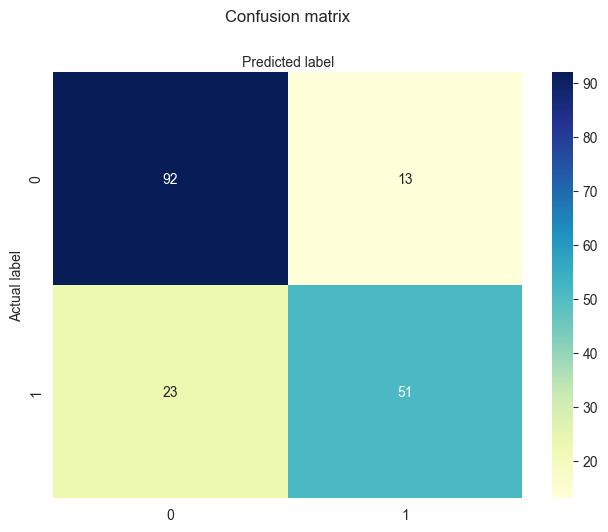

In [18]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

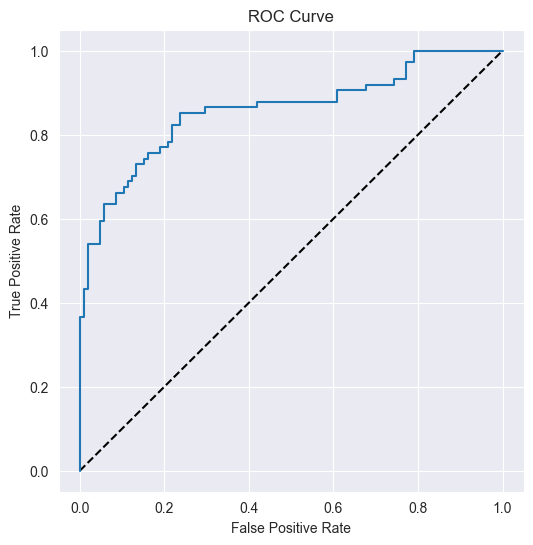

In [19]:
# Visualizing 'ROC' curve
%matplotlib inline

y_scores = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
# Visualizing 'ROC AUC' curve
roc_auc_score(y_test, y_scores[:,1])


0.858944658944659